# Análise Univariada - Student Habits vs Academic Performance

# Importação das bibliotecas e funções

In [54]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.path.join(os.getcwd(), '..'))
# importamos as funções feitas em python da análise univariada
from src.funcoes_analise_uni import *

# Introdução

Neste notebook, realizamos a análise univariada (tanto a incondicional e a condicionada por classe) do dataset
'Student Habits vs Academic Performance' presente no site kaggle.com.
Nosso objetivo é entender o comportamento das variáveis categóricas e numéricas estando elas condicionadas ou não ao nosso target, que é a perfomance do estudante, dada pela coluna exam\_score (nosso rótulo), que foi discretizada em 4 categorias sendo elas:
• Reprovado: exam_score < 40
• Recuperação: 40 ≤ exam_score < 70
• Bom: 70 ≤ exam_score < 90
• Excelente: exam_score ≥ 90

Temos que a essência das análises univariadas é buscar entender como os valores dessas variáveis se distribuem, por meio de medidas e gráficos. Portanto, para os fins desse trabalho serão analisada as:
- Variáveis numéricas: média, desvio padrão e assimetria.
- Variáveis categóricas: distribuição de frequências.
- Variáveis condicionadas por classe.


# Carregar e visualizar os dados

In [35]:
#Verifique seu diretório de trabalho ao rodar o código
from pathlib import Path
print(Path.cwd())

/home/victor/Estudos/ica/Homework1/HW1----ICA-2025.2/notebooks


In [36]:
# Caso o working directory não esteja em /notebooks rode:
# %cd seu_caminho/notebooks

In [47]:
caminho_csv = "../dados/student_habits_performance.csv"

# carregar o dataset com a função que fizemos
df = carregar_dados(caminho_csv)

# visualizar primeiras linhas, padrão em projetos de análise de dados
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


# Informações gerais do dataset

In [48]:
print("Informações gerais:")
print("-" * 50)
print(f"Número de observações: {df.shape[0]}")
print(f"Número de variáveis: {df.shape[1]}")
print("\nTipos de dados:")
print(df.dtypes)

print("\nEstatísticas descritivas (resumo geral):")
display(df.describe())

Informações gerais:
--------------------------------------------------
Número de observações: 1000
Número de variáveis: 16

Tipos de dados:
student_id                        object
age                                int64
gender                            object
study_hours_per_day              float64
social_media_hours               float64
netflix_hours                    float64
part_time_job                     object
attendance_percentage            float64
sleep_hours                      float64
diet_quality                      object
exercise_frequency                 int64
parental_education_level          object
internet_quality                  object
mental_health_rating               int64
extracurricular_participation     object
exam_score                       float64
dtype: object

Estatísticas descritivas (resumo geral):


,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


# Análise univariada incondicional

Aqui vamos analisar todas as variáveis numéricas sem considerar a classe,
calculando estatísticas que descrevem nosso banco e gerando histogramas e boxplots.

,media,desvio_padrao,assimetria
age,20.4980,2.308100,0.008424
study_hours_per_day,3.5501,1.468890,0.054172
social_media_hours,2.5055,1.172422,0.119625
netflix_hours,1.8197,1.075118,0.236799
attendance_percentage,84.1317,9.399246,-0.237454
sleep_hours,6.4701,1.226377,0.091347
exercise_frequency,3.0420,2.025423,-0.031875
mental_health_rating,5.4380,2.847501,0.037754
exam_score,69.6015,16.888564,-0.156116


Gerando histogramas e boxplots das variáveis numéricas...


FileNotFoundError: [Errno 2] No such file or directory: 'notebooks/resultados/figuras/hist_age.png'

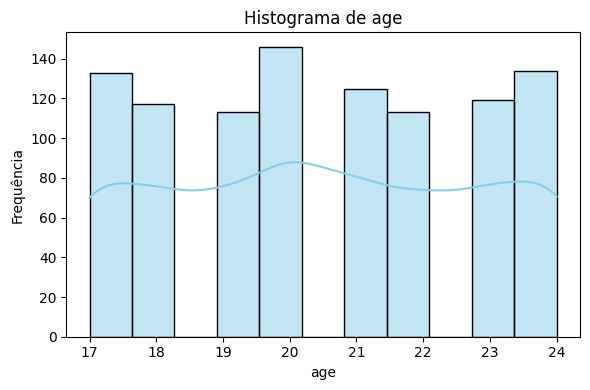

In [55]:
#está na estrutura do github e armazena tanto as figuras produzidas nas funções univariadas quanto as tabelas
#estatísticas das variáveis numéricas
sumario_univariado = estatisticas(df)
display(sumario_univariado)

# salvar tabela
sumario_univariado.to_csv("resultados/tables/sumario_univariado.csv")

# plotar gráficos
print("Gerando histogramas e boxplots das variáveis numéricas...")
plotar_histogramas(df)
plotar_boxplots(df)
print("Gráficos numéricos salvos em 'resultados/figuras'")


# Análise univariada incondicional de variáveis categóricas

Para variáveis não numéricas (categóricas), a análise univariada incondicional é feita
por meio de contagem de frequências em gráficos de barras, ou seja, para todas as variáveis categórias (com exceção de exam\_score que foi dividida em 4 categorias para ser futuramente usada como target na análise condicionada à classe), terá uma barra de um valor único observado no dataset, se fossemos o exam\_score sem essa divisão nós teríamos um gráfico de barras com *muitas* barras dado que as notas podem ir de 0.0 até 100.0. Logo, fazemos:

In [40]:
analise_categoricas(df)
print("Gráficos categóricos salvos em 'resultados/figuras'")

Gráficos categóricos salvos em 'resultados/figuras'


perceba que se fossemos mostrar todos os gráficos aqui no notebook teríamos *muitas* imagens, o que prejudicaria o nosso desempenho, por isso a decisão de salvar todos os gráficos em uma pasta separada. Iremos também fazer a análise deles.

In [41]:
print(df.columns)


Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')


In [42]:
df = carregar_dados(caminho_csv)
df = categorizar_performance(df)   # cria a coluna Performance
sumario_condicional = analise_univariada_condicional(df, classe_col="Performance")


/home/victor/Estudos/ica/Homework1/HW1----ICA-2025.2/notebooks/../src/funcoes_analise_uni.py:144: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


Análise univariada condicional concluída!


In [43]:
print(df.columns)

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score',
       'Performance'],
      dtype='object')


# Análise univariada condicionada por classe
Agora, vamos analisar as mesmas variáveis numéricas e categóricas, mas separadas
de acordo com a variável de classe 'Performance' vinda do agrupamento de exam\_score.
Isso permite identificar diferenças entre os grupos, ou seja, poderíamos ter por exemplo um gráfico que mostrasse as horas de estudo condicionadas à categoria "Reprovado" e nele observaríamos um "pico" da frequência com uma quantidade de horas pequena. indicanto uma relação óbvia de quanto menos horas de estudo -> maior frequência na categoria de "Reprovado"

In [44]:
# nome da coluna de classe
classe_col = "Performance"

# executar análise condicional
sumario_condicional = analise_univariada_condicional(df, classe_col=classe_col)

# visualizar resultados
display(sumario_condicional.head())

# salvar tabela
sumario_condicional.to_csv("resultados/tables/sumario_condicional.csv")
print("Tabelas e gráficos condicionais salvos em 'resultados/'")

/home/victor/Estudos/ica/Homework1/HW1----ICA-2025.2/notebooks/../src/funcoes_analise_uni.py:144: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


Análise univariada condicional concluída!


,media,desvio_padrao,assimetria,classe
age,20.519016,2.311789,-0.002517,Recuperação
study_hours_per_day,2.737360,1.035541,-0.137888,Recuperação
social_media_hours,2.644743,1.172733,0.074956,Recuperação
netflix_hours,1.964206,1.073997,0.104877,Recuperação
attendance_percentage,83.164206,9.442380,-0.205007,Recuperação


Tabelas e gráficos condicionais salvos em 'resultados/'


# Interpretação e comentários
"""

"""

# Resumo final automatizado

In [45]:

print("Análise univariada completa!")
print("Resultados disponíveis em:")
print("- resultados/tables/sumario_univariado.csv")
print("- resultados/tables/sumario_condicional.csv")
print("- resultados/figuras/ (histogramas, boxplots e barras)")

Análise univariada completa!
Resultados disponíveis em:
- resultados/tables/sumario_univariado.csv
- resultados/tables/sumario_condicional.csv
- resultados/figuras/ (histogramas, boxplots e barras)
